<a href="https://colab.research.google.com/github/yasushisakai/liquid_democracy_colab/blob/main/liquid_democracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0.  0.2 0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0.  0.  0. ]
 [0.3 0.  0.  0.5 1.  0.  0. ]
 [0.2 0.  0.  0.5 0.  1.  0. ]
 [0.2 0.  1.  0.  0.  0.  1. ]]
after iteration: 
[[1.12589991e-85 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.12589991e-85 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.25179981e-85 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.50359963e-85 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.46938776e-01 4.69387755e-01 0.00000000e+00 5.00000000e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.44897959e-01 4.48979592e-01 0.00000000e+00 5.00000000e-01
  0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [4.08163265e-01 8.16326531e-02 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000

<Axes: >

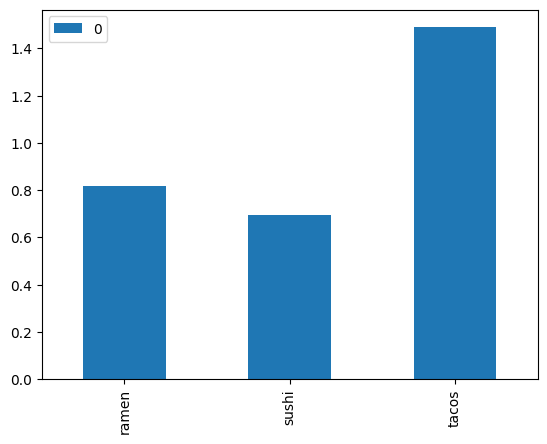

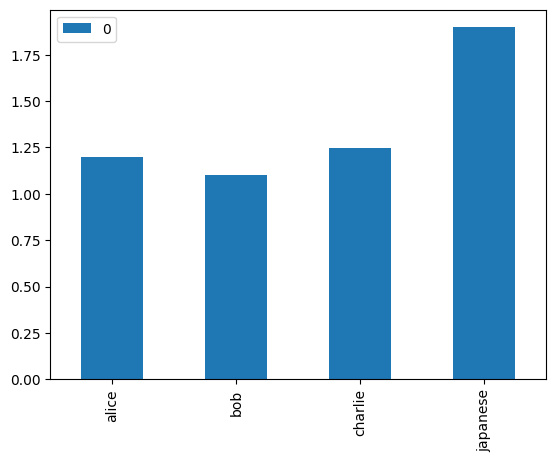

In [75]:
import pandas as pd
import numpy as np
import networkx as nx

num_delegates = 3
num_intermediaries = 1
num_policies = 3

votes = {
    'alice':    [  0, 0.1, 0.2,   0, 0.3, 0.2, 0.2], # delegate
    'bob':      [0.2,   0,   0, 0.8,   0,   0,   0], # delegate
    'charlie':  [  0,   0,   0,   0,   0,   0, 1.0], # delegate
    'japanese': [  0,   0,   0,   0, 0.5, 0.5,   0], # intermediate: equally votes to 'ramen' and 'sushi'
    'ramen':    [  0,   0,   0,   0, 1.0,   0,   0], # policies
    'sushi':    [  0,   0,   0,   0,   0, 1.0,   0], # policies
    'tacos':    [  0,   0,   0,   0,   0,   0, 1.0], # policies
}


v = pd.DataFrame(data = votes).to_numpy()

print(v)

a = np.eye(len(votes))
influence = np.eye(len(votes))

for i in range(100):
    a = np.dot(v, a)
    influence += a 

print('after iteration: ')
print(a)

sub = a[np.ix_(range(num_delegates+num_intermediaries, len(votes)), range(0, num_delegates))]
results = np.sum(sub, axis = 1)
results_df = pd.DataFrame(data=results, index=['ramen', 'sushi', 'tacos'])

results_df.plot(kind='bar')

sub = influence[np.ix_(range(0, num_delegates+num_intermediaries), range(0, num_delegates+num_intermediaries))]
influences = np.sum(sub, axis = 1) / sub.diagonal()
influences_df = pd.DataFrame(data=influences, index=['alice', 'bob', 'charlie', 'japanese'])

influences_df.plot(kind='bar')

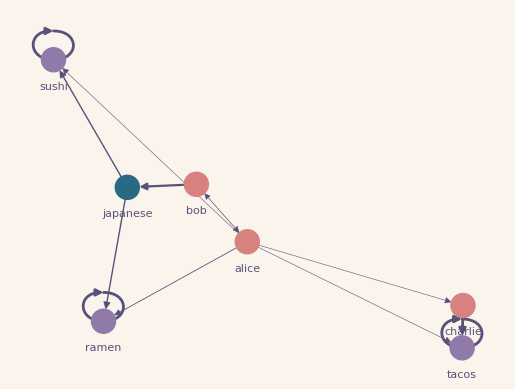

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# nodes
labels = {}
keys = list(votes.keys())
node_color = ['#d7827e']*3 + ['#286983']*1 + ['#907aa9']*3
for (i, k) in enumerate(keys):
  G.add_node(i, name=k)
  labels[i] = k

# edges
widths = []
for (i, targets) in enumerate(list(votes.values())):
  for (j, value) in enumerate(targets):
    if value > 0.0 :
      G.add_edge(i, j, weight=value)
      widths.append(value*2)
      

pos = nx.spring_layout(G, seed=5, scale=0.2)
label_pos = {k:([v[0], v[1]-0.03]) for k,v in pos.items()}

fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, node_color=node_color)
nx.draw_networkx_labels(G, label_pos, labels, font_size=8, font_color='#575279')
nx.draw_networkx_edges(G, pos, width=widths, edge_color='#575279')
ax.set_facecolor('#faf4ed')
ax.axis('off')
fig.set_facecolor('#faf4ed')
plt.show()
# nx.draw_networkx_edge_labels(G, pos)

policy wise 'tacos' wins and 'japanese' is most influential